# Chirp to ROC
This notebook applies some ML binary classification techniques to a simple 2D dataset and looks at the results with "confusion dots" and ROC plots.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

from sklearn.metrics import accuracy_score

# to reload the custom library
from imp import reload
# custom library
import chirp_roc_lib as chp

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.5, 5.5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### (Re)Load the custom routines

In [3]:
reload(chp)

<module 'chirp_roc_lib' from '/home/dd/Documents/Python/chirp-to-ROC/chirp_roc_lib.py'>

### The 2D "diagonal chirp"

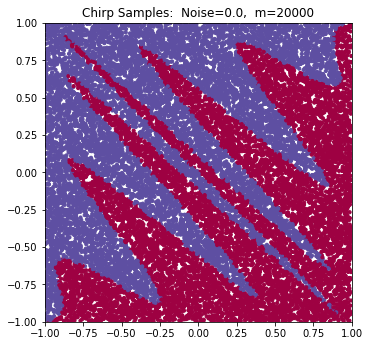

In [4]:
# Show the chirp model with no noise and many samples
show_noise=0.0
X_show, y_show = chp.make_chirp(n_out=20000, nhalfcycles=6.5, noise=show_noise, symmetric=False)

chp.plot_Xy(X_show, y_show, title="Chirp Samples:  Noise={},  m={}".format(show_noise,len(y_show)),
                                   s = 10)

### Training and Test sets
The "test" set is very large to get an accurate measure of the model performance.

In [5]:
# Size of the Training and Test sets...

# Smaller Training is more likely to cause/allow overfitting
m_train = 250  #100  #250  #800  #2000

# Do a large test size to see accurately how the model preforms what the model looks like
m_test = 10000

In [6]:
# Could use an sklearn generator, e.g., make_moons, to generate X,Ys:
# Training set
##train_X, train_Y = sklearn.datasets.make_moons(n_samples=m_train, noise=0.2)
# Test set
##test_X, test_Y = sklearn.datasets.make_moons(n_samples=m_test, noise=0.2)

In [7]:
# Use the chirp to generate the training and test sets

# Using: nhalfcycles=6.5, warpexp=0.65, symmetric=False, noise=0.035;  this noise limits accuracy to ~ 85 % .

# Training set
X_train, y_train = chp.make_chirp(n_out=m_train, nhalfcycles=6.5, noise=0.035, symmetric=False)
# Test set
X_test, y_test = chp.make_chirp(n_out=m_test, nhalfcycles=6.5, noise=0.035, symmetric=False)

In [8]:
# The sizes and types of the training and test sets
print(X_train.shape, X_train.dtype, y_train.shape, y_train.dtype, X_test.shape, y_test.shape)

(250, 2) float64 (250,) float64 (10000, 2) (10000,)


In [9]:
# example values
print( X_train[0,:], y_train[0])

[-0.48261843  0.52207664] 1.0


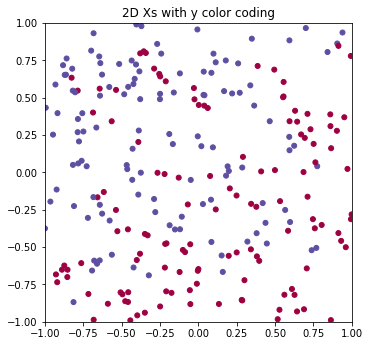

In [10]:
   chp.plot_Xy(X_train, y_train)

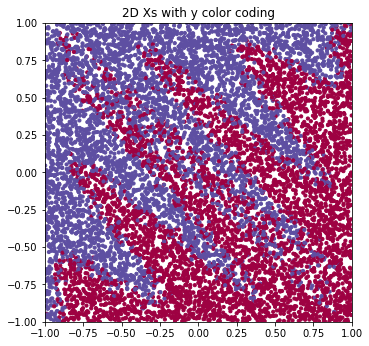

In [11]:
   chp.plot_Xy(X_test, y_test, s=10)

## Pick a Model

- - -
### Random model

In [12]:
# Just flip a coin (actually assign a random value from 0 to 1)
# No model to Train
model_str = "Random model"

In [13]:
# Evaluate the model on training data
y_score_train = np.random.rand(len(y_train))
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 52.40 %


In [14]:
# Evaluate the model on the test data
y_score = np.random.rand(len(y_test))
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 50.49 %


In [15]:
# --> Now go below to "Show model performance"

### Really simple model

In [16]:
# Really simple model: more likely to be y=1 (blue) when x1 is larger, 
# so map x1 to 0 to 1 using: y_score = 0.5 * (X_test[:, 1] + 1.0)
model_str = "Simple model"

In [17]:
# Evaluate the model on training data
y_score_train = 0.5 * (X_train[:, 1] + 1.0)
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 65.2 %


In [18]:
# Evaluate the model on the test data
y_score = 0.5 * (X_test[:, 1] + 1.0)
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 65.7 %


In [19]:
# --> Now go below to "Show model performance"

### Logistic Regression Model

In [20]:
# Use sklearn Logistic Regression
model_str = "Logistic Regr."
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1e5, verbose=1)
# and do the fit:
model.fit( X_train, y_train )
print(model)

[LibLinear]LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=1, warm_start=False)


In [21]:
# Evaluate the model on training data (for y=1, hence the [:,1])
y_score_train = model.predict_proba(X_train)[:,1]
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 72.39 %


In [22]:
# Evaluate the model on the test data
y_score = model.predict_proba(X_test)[:,1]
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 73.88 %


In [23]:
# --> Now go below to "Show model performance"

### Nonlinear SVM Classification

In [24]:
# From Geron'sHands-On Machine Learning book
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC

#### SVM with Polynomial Features

In [25]:
# Use polynomial features...
model_str="SVM-Poly"
#
poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=7)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=2, loss="hinge", verbose=1, max_iter=50000, penalty='l2'))
])
# and do the fit:
poly_svm_clf.fit(X_train, y_train)

[LibLinear]

/home/dd/Documents/Anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=7, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=50000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=1))])

In [26]:
# Evaluate the model on training data
y_score_train = poly_svm_clf.predict(X_train)
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 75.6 %


In [27]:
# Evaluate the model on the test data
y_score = poly_svm_clf.predict(X_test)
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 72.18 %


In [28]:
# --> Now go below to "Show model performance"

#### SVM with a Kernel

In [29]:
# Use a kernel instead 
model_str="SVM-kernel"
#
#                  very little regularization:   gamma=1, C=10
#                  good/medium amount (w/m=250)  gamma=0.7,  C=1
#                  heavily regularized           gamma=0.3, C=0.01
polykern_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=15, coef0=1.0, gamma=0.7, C=1, max_iter=2000000, 
                    probability=False, verbose=1))
])
# and do the fit:
polykern_svm_clf.fit(X_train, y_train)

[LibSVM]

/home/dd/Documents/Anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=15, gamma=0.7, kernel='poly',
  max_iter=2000000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=1))])

In [30]:
# Evaluate the model on training data
y_score_train = polykern_svm_clf.predict(X_train)
# Get the training accuracy
train_accuracy = accuracy_score(y_train, (y_score_train > 0.5))
print( "Accuracy = " + str( 100.0*train_accuracy )[0:5] + " %" )

Accuracy = 92.80 %


In [31]:
# Evaluate the model on the test data
y_score = polykern_svm_clf.predict(X_test)
# The test accuracy
test_accuracy = accuracy_score(y_test, (y_score > 0.5))
print( "Accuracy = " + str( 100.0*test_accuracy )[0:5] + " %" )

Accuracy = 71.54 %


In [32]:
# --> Now go below to "Show model performance"

- - -
## Show the model performance

### Confusion Matrix, Confusion-Dots Plot, and the ROC

In [33]:
# Look at the distribution of y_score (for fun)
##import seaborn as sns
##sns.distplot(y_score, kde=False, rug=False)


Confusion matrix:

   Predicted   0.0   1.0
Actual                 
0.0          3304  1677
1.0          1169  3850

Results:

 False Pos =  33.6679381650271 %
 False Neg =  23.291492329149232 %
    Recall =  76.70850767085076 %
 Precision =  69.65804233761534 %

    Accuracy =  71.54 %
 Pos. fract. =  50.19 %


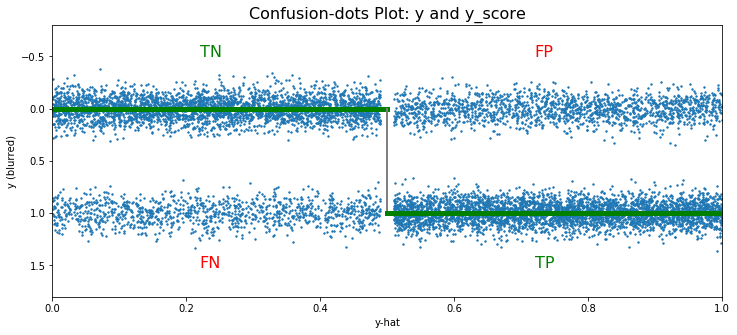

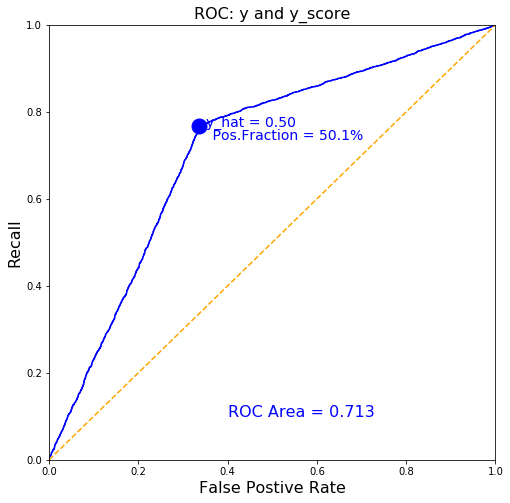

In [34]:
# How does the y_score do?
ysframe = chp.y_yhat_plots(y_test, y_score)

In [35]:
# Can look at the dataframe that is returned
##ysframe.head(5)
##ysframe.tail(5)

### Show how the model assigned classes

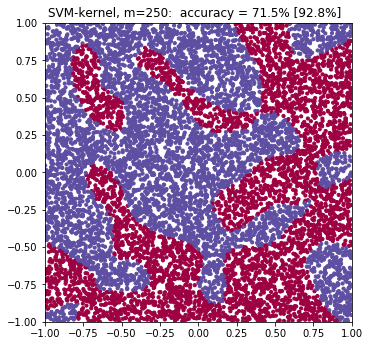

In [36]:
y_pred = 1*(y_score > 0.5)
title_str = (model_str+", m="+str(len(y_train))+':  accuracy = '+str(100.0*test_accuracy)[0:4]+
             "% ["+str(100.0*train_accuracy)[0:4]+"%]  ")
chp.plot_Xy(X_test, y_pred, s=10, title=title_str)

### Using sklearn

In [ ]:
# Confusion matrix
##from sklearn.metrics import confusion_matrix
##conf_matrix = confusion_matrix(y_test,y_pred)
##conf_matrix

In [ ]:
# generate an accuracy score by comparing expected to predicted.
##from sklearn.metrics import accuracy_score
##accuracy = accuracy_score(y_test, y_pred)
##print( "Accuracy = " + str( accuracy ) )